# Heart Disease

Heart Disease | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

In [86]:
ls

AHeartDisease.ipynb  heart-attack.jpg  heart-disease-uci.zip
health-robot.jpg     heart.csv


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

In [88]:
trainx = pd.read_csv("./heart.csv")

In [89]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h1>Significado de los atributos</h1>
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: asymptomatic
        1: angina atipico
        2: Dolor no anginal
        3: angina tipico
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results
        0: showing probable or definite left ventricular hypertrophy by Estes' criteria
        1: normal
        2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST
         0: pendiente descendente
         1: plano
         2: ascenso
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia
         1: defecto fijo
         2: normal;
         7: defecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: Enfermo
         1: No enfermo
    </li> 
    
</ul>

In [91]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [92]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [93]:
print(trainx.isnull().sum())
print("------------------")
print(trainx.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


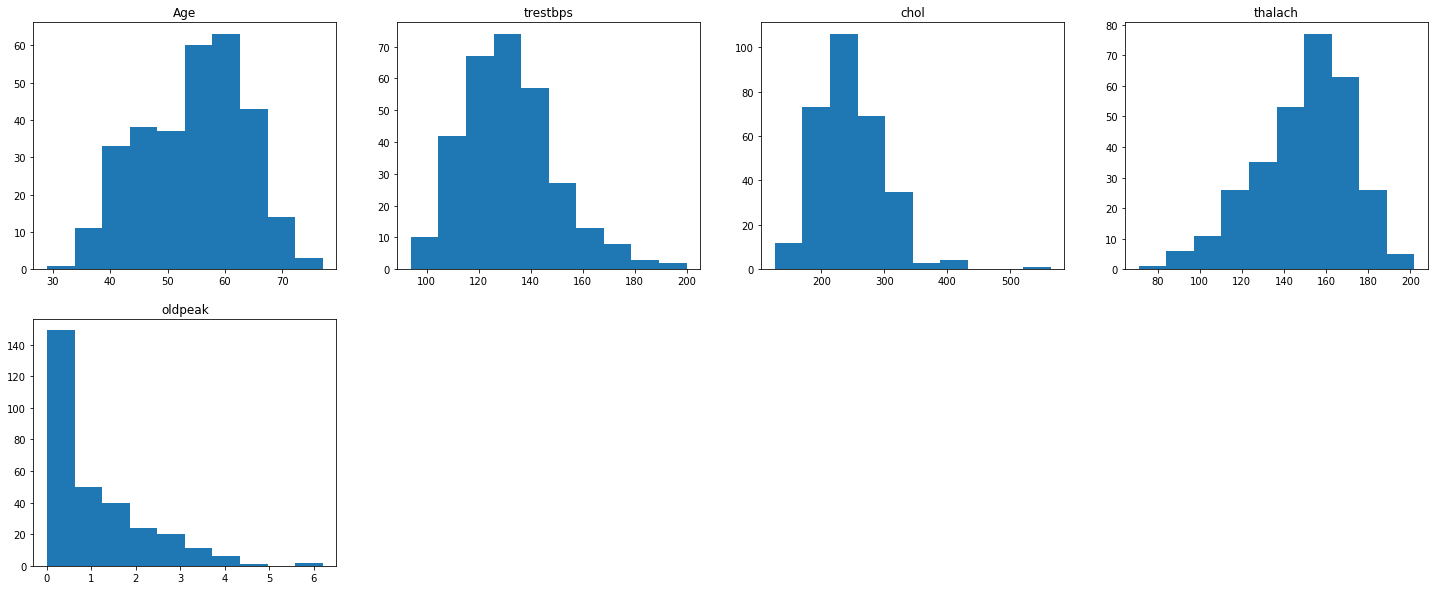

In [141]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])



plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

Text(0.5,1,'Target')

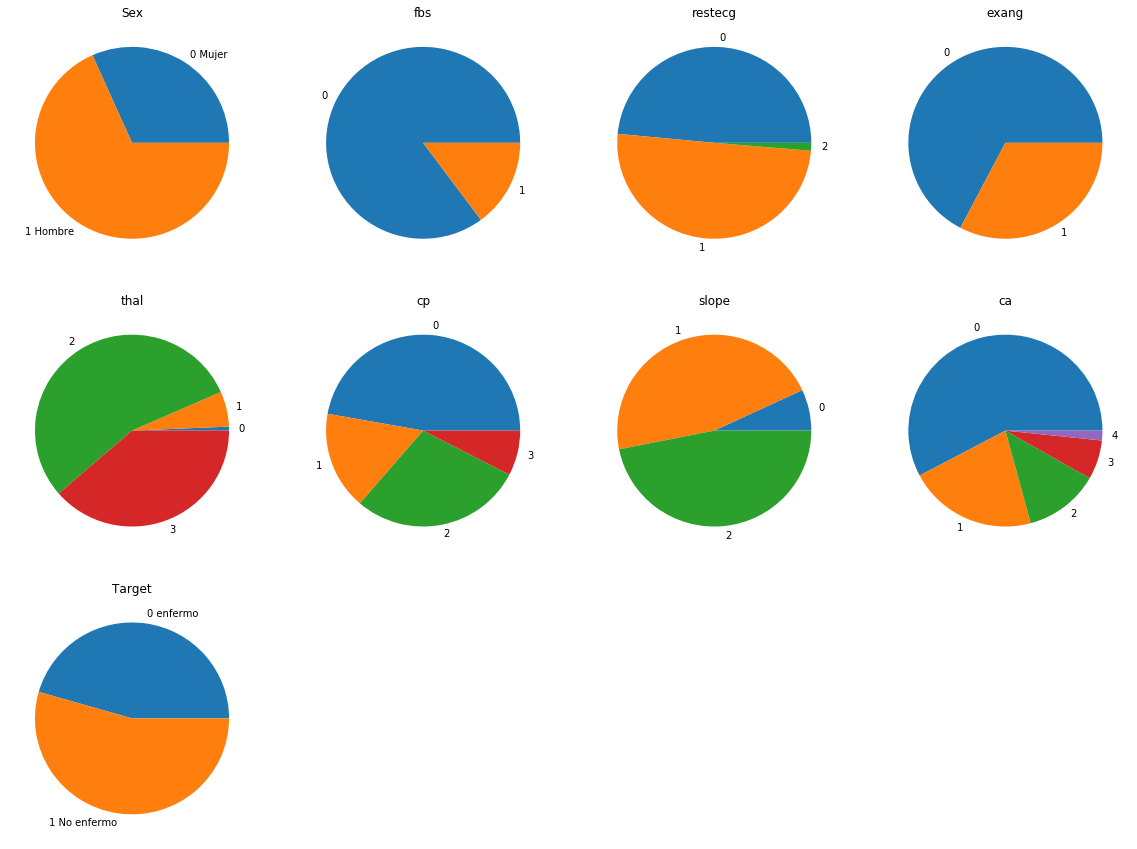

In [95]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0", "1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 enfermo", "1 No enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels)
plt.title('Target')



In [96]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar es probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, train_size=0.28)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((84, 13), (84,))
((61, 13), (61,))


# Trees

In [97]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

confusion_matrix(model1.predict(testX), testY)

Train: 0.9642857142857143
Test: 0.7213114754098361


array([[18,  3],
       [14, 26]])

<h2>Gráfica de Importancias y Árbol</h2>


(array([0.14886556, 0.39533583, 0.03643725, 0.        , 0.05510571,
       0.09676113, 0.11902834, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14846618]), 0.7755775577557755)


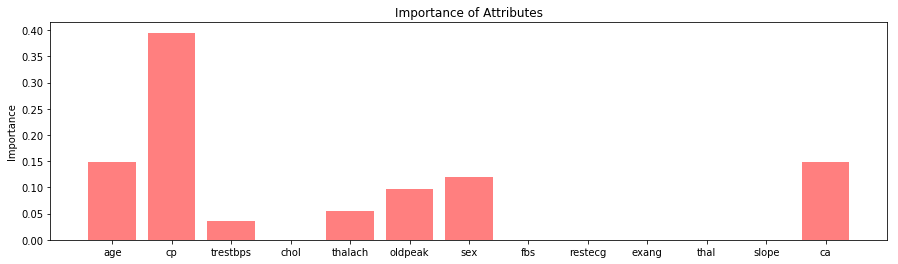

In [98]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

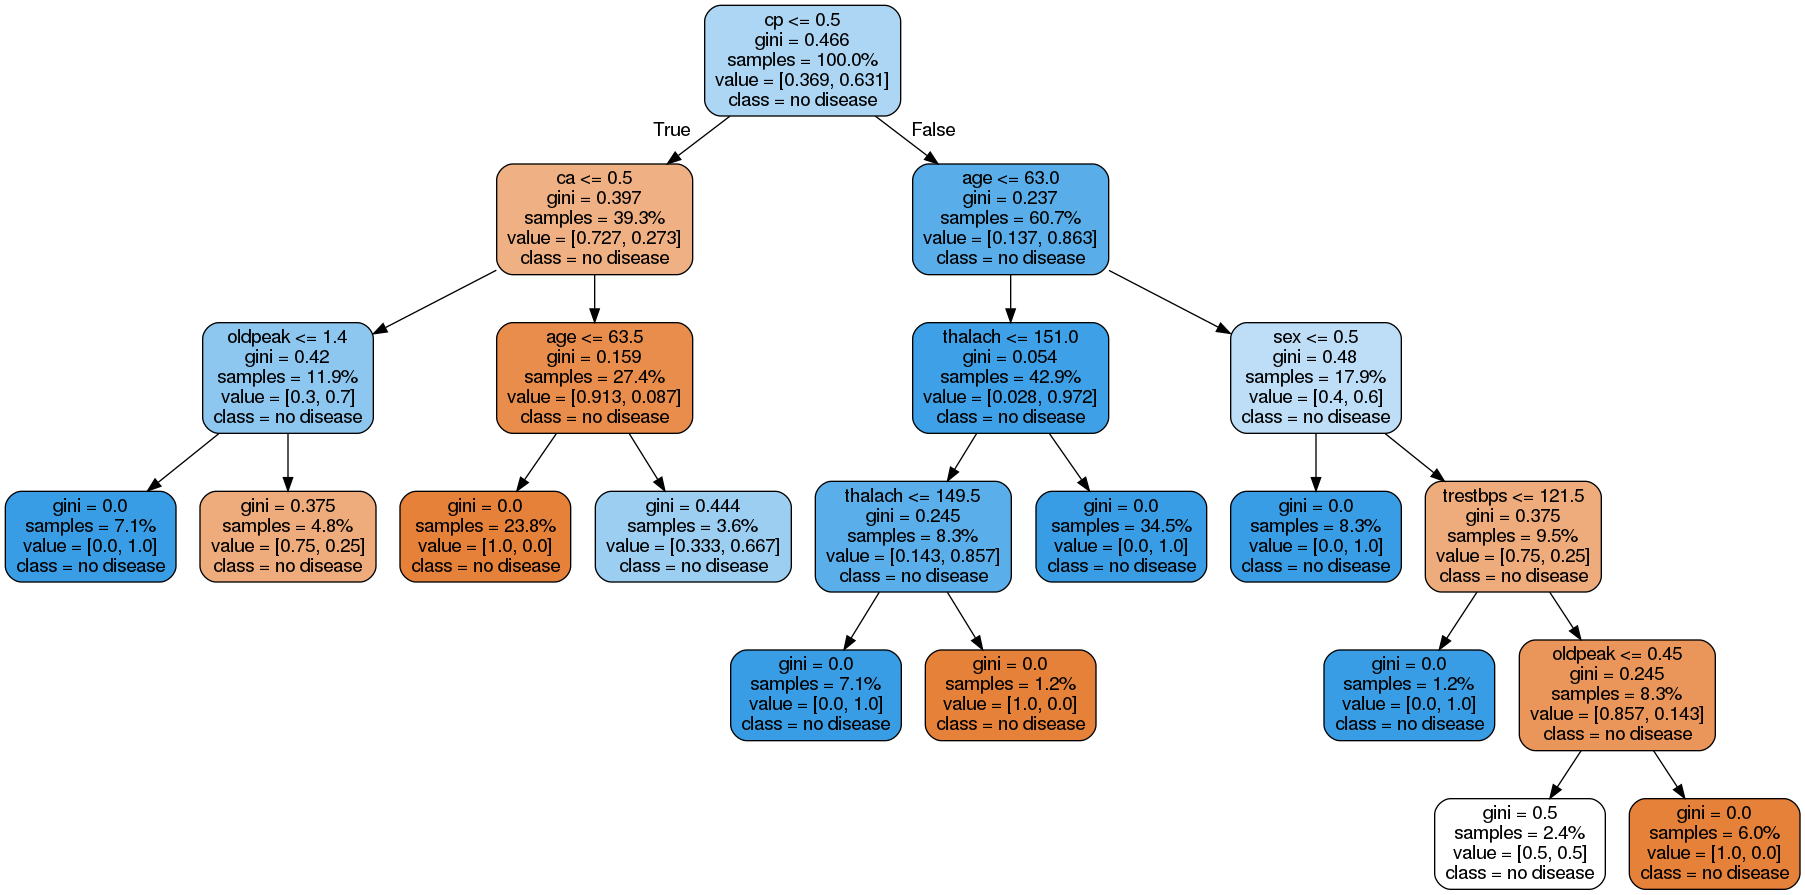

In [99]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Naive Bayes

In [100]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix

confusion_matrix(model2.predict(testX), testY)

Train: 0.8690476190476191
Test: 0.819672131147541


array([[26,  5],
       [ 6, 24]])

# Neural Network

In [101]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

On training
0.9880952380952381
[[30  0]
 [ 1 53]]

On test
0.7213114754098361
[[19  4]
 [13 25]]


In [138]:
network = Sequential()
network.add(Dense(13, input_dim=13, activation='sigmoid'))
# network.add(Dense(10, activation='sigmoid'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainX, trainY, epochs=100)

scoreT = network.evaluate(testX, testY)
scoreE = network.evaluate(trainX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)





Epoch 1/100
84/84 [==============================] - 1s 10ms/step - loss: 8.7659 - binary_accuracy: 0.5156
Epoch 2/100
84/84 [==============================] - 0s 105us/step - loss: 8.5678 - binary_accuracy: 0.5156
Epoch 3/100
84/84 [==============================] - 0s 92us/step - loss: 8.3969 - binary_accuracy: 0.5174
Epoch 4/100
84/84 [==============================] - 0s 103us/step - loss: 8.2771 - binary_accuracy: 0.5201
Epoch 5/100
84/84 [==============================] - 0s 90us/step - loss: 8.2042 - binary_accuracy: 0.5156
Epoch 6/100
84/84 [==============================] - 0s 178us/step - loss: 8.1221 - binary_accuracy: 0.5137
Epoch 7/100
84/84 [==============================] - 0s 145us/step - loss: 8.0704 - binary_accuracy: 0.5137
Epoch 8/100
84/84 [==============================] - 0s 135us/step - loss: 8.0191 - binary_accuracy: 0.5119
Epoch 9/100
84/84 [==============================] - 0s 131us/step - loss: 7.9762 - binary_accuracy: 0.5073
Epoch 10/100
84/84 [===========

Epoch 75/100
84/84 [==============================] - 0s 125us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 76/100
84/84 [==============================] - 0s 235us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 77/100
84/84 [==============================] - 0s 127us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 78/100
84/84 [==============================] - 0s 128us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 79/100
84/84 [==============================] - 0s 95us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 80/100
84/84 [==============================] - 0s 156us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 81/100
84/84 [==============================] - 0s 95us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 82/100
84/84 [==============================] - 0s 109us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 83/100
84/84 [==============================] - 0s 75us/step - loss: 7.5603 - binary_accuracy: 0.4707
Epoch 84/100
84/84 [==

In [139]:
network.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 13)                182       
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [140]:
network.get_weights()

[array([[-0.47591963, -0.00113085, -0.53118986, -0.24489965, -0.03115997,
         -0.02486883, -0.17490222,  0.45141298, -0.09912452, -0.5259186 ,
         -0.19512871,  0.47233683,  0.00271362],
        [ 0.17020983, -0.0968747 , -0.4558798 , -0.09278685, -0.09866592,
          0.26465377,  0.09552821, -0.16361895,  0.04702973, -0.38687623,
          0.22256374, -0.0485467 ,  0.22154349],
        [-0.15123042,  0.23573324, -0.06573353, -0.11860651,  0.269948  ,
         -0.23258628,  0.14932938, -0.22188854,  0.17444754,  0.12580019,
         -0.11189181, -0.46166983, -0.25449944],
        [-0.16720921,  0.10328679,  0.2883166 ,  0.39276534,  0.2399162 ,
          0.15621637, -0.52358085,  0.3229757 , -0.28692418,  0.20391718,
         -0.4633702 , -0.45174858,  0.29291606],
        [ 0.2070669 , -0.21717958, -0.5207123 ,  0.2580499 ,  0.29443622,
         -0.20713864,  0.3756407 ,  0.0970791 , -0.14432481, -0.5168069 ,
          0.1398049 ,  0.3656416 ,  0.25910044],
        [-0.228